In [167]:
from sqlalchemy import create_engine

ADDR="10.114.22.20"
PORT=55432
USERNAME="postgres"
PASSWORD="postgres"
DBNAME="postgres"

ALGO_NAMES = [
    "dfuzzystream",
    "sfcm",
    "fcm",
    "umicro"
]

ALGO_TRAIN_PREFIX="train_without_history_270620"
ALGO_TEST_PREFIX="test_without_history_270620"

ALGORITHM = ALGO_NAMES[3]



TRAIN_ALGORITHM_PREFIX_NAME=f"{ALGO_TRAIN_PREFIX}_{ALGORITHM}"
TRAIN_POINT_TABLE=f"{TRAIN_ALGORITHM_PREFIX_NAME}_points"
TRAIN_CLUSTER_TABLE=f"{TRAIN_ALGORITHM_PREFIX_NAME}_clusters"
TRAIN_PREDICTION_TABLE=f"{TRAIN_ALGORITHM_PREFIX_NAME}_predict"


TEST_ALGORITHM_PREFIX_NAME=f"{ALGO_TEST_PREFIX}_{ALGORITHM}"
TEST_POINT_TABLE=f"{TEST_ALGORITHM_PREFIX_NAME}_points"
TEST_CLUSTER_TABLE=f"{TEST_ALGORITHM_PREFIX_NAME}_clusters"
TEST_PREDICTION_TABLE=f"{TEST_ALGORITHM_PREFIX_NAME}_predict"

engine = create_engine(f"postgresql://{USERNAME}:{PASSWORD}@{ADDR}:{PORT}/{DBNAME}")

In [168]:
#Use timestampts to save results
import datetime
current_time = datetime.date.today()

In [169]:
## Read data

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation


df_train_origin = pd.read_sql_query(f"""
SELECT {TRAIN_PREDICTION_TABLE}.timestamp, data_point, {TRAIN_PREDICTION_TABLE}.cluster_label, data_point_membership, centroid FROM
              {TRAIN_PREDICTION_TABLE} join {TRAIN_CLUSTER_TABLE}
                  on {TRAIN_PREDICTION_TABLE}.timestamp = {TRAIN_CLUSTER_TABLE}.timestamp and
                     {TRAIN_PREDICTION_TABLE}.cluster_label = {TRAIN_CLUSTER_TABLE}.unique_label""", engine)



df_test_origin = pd.read_sql_query(f"""
SELECT {TEST_PREDICTION_TABLE}.timestamp, data_point, {TEST_PREDICTION_TABLE}.cluster_label, data_point_membership, centroid FROM
              {TEST_PREDICTION_TABLE} join {TEST_CLUSTER_TABLE}
                  on {TEST_PREDICTION_TABLE}.timestamp = {TEST_CLUSTER_TABLE}.timestamp and
                     {TEST_PREDICTION_TABLE}.cluster_label = {TEST_CLUSTER_TABLE}.unique_label""", engine)



In [170]:
df_train

,data_point,cluster_label,data_point_membership,centroid,data_point_unique_id
timestamp,,,,,
2020-07-08 11:26:25.269,"[-4.118934702806855, 2.2149456970377432]",2,1.0,"[7.737547410238246, 5.1868342220582475]",[-4.1189347 2.2149457]
2020-07-08 11:26:25.269,"[1.108009699277983, -1.5160203059636368]",2,1.0,"[7.737547410238246, 5.1868342220582475]",[ 1.1080097 -1.51602031]
2020-07-08 11:26:25.269,"[-2.9951467901438544, 8.060357875155676]",2,1.0,"[7.737547410238246, 5.1868342220582475]",[-2.99514679 8.06035788]
2020-07-08 11:26:25.269,"[0.7508518050438997, -9.94128717690111]",2,1.0,"[7.737547410238246, 5.1868342220582475]",[ 0.75085181 -9.94128718]
2020-07-08 11:26:25.269,"[-7.933551616890465, -0.0344921139186275]",2,1.0,"[7.737547410238246, 5.1868342220582475]",[-7.93355162 -0.03449211]
...,...,...,...,...,...
2020-07-08 11:27:23.004,"[23.180441270295454, -51.946726590998196]",1,1.0,"[8.562003704621597, -53.95185305883638]",[ 23.18044127 -51.94672659]
2020-07-08 11:27:23.004,"[10.659763816857515, -67.34088402478162]",3,1.0,"[23.180441270295454, -51.946726590998196]",[ 10.65976382 -67.34088402]
2020-07-08 11:27:23.664,"[32.07478765074362, -40.74945778079078]",1,1.0,"[53.076179285738874, -47.203563850297314]",[ 32.07478765 -40.74945778]


In [171]:
df_train = df_train_origin.copy()
df_test = df_test_origin.copy()


In [172]:
# FOR TRAIN DATA
#transform timestamp from string into correct format
df_train["timestamp"] = df_train["timestamp"].apply(lambda x: pd.Timestamp(x))
 
# transform data_point and centroid into numpy arrays
casted_data_points = df_train["data_point"].apply(lambda x: np.array(x))
df_train["data_point"] = casted_data_points

# add has for data points
df_train["data_point_unique_id"] = df_train["data_point"].apply(str)

casted_centroids = df_train["centroid"].apply(lambda x: np.array(x))
df_train["centroid"] = casted_centroids



# FOR TEST DATA
#transform timestamp from string into correct format
df_test["timestamp"] = df_test["timestamp"].apply(lambda x: pd.Timestamp(x))
 
# transform data_point and centroid into numpy arrays
casted_data_points = df_test["data_point"].apply(lambda x: np.array(x))
df_test["data_point"] = casted_data_points

# add has for data points
df_test["data_point_unique_id"] = df_test["data_point"].apply(str)

casted_centroids = df_test["centroid"].apply(lambda x: np.array(x))
df_test["centroid"] = casted_centroids


In [173]:
# set timestamp as index by default

df_train = df_train.set_index("timestamp")
df_test = df_test.set_index("timestamp")



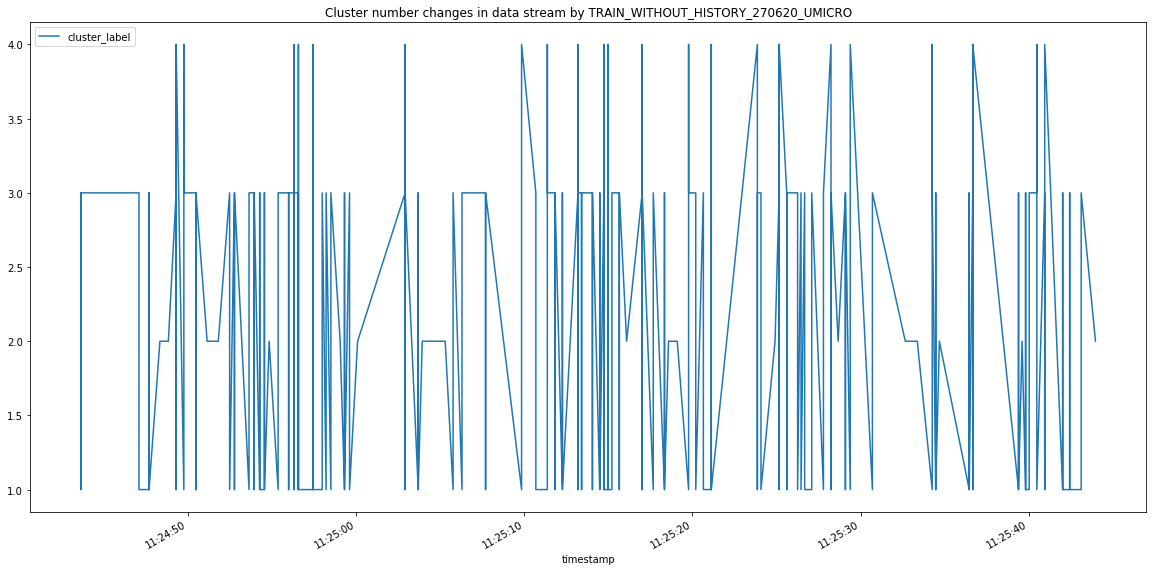

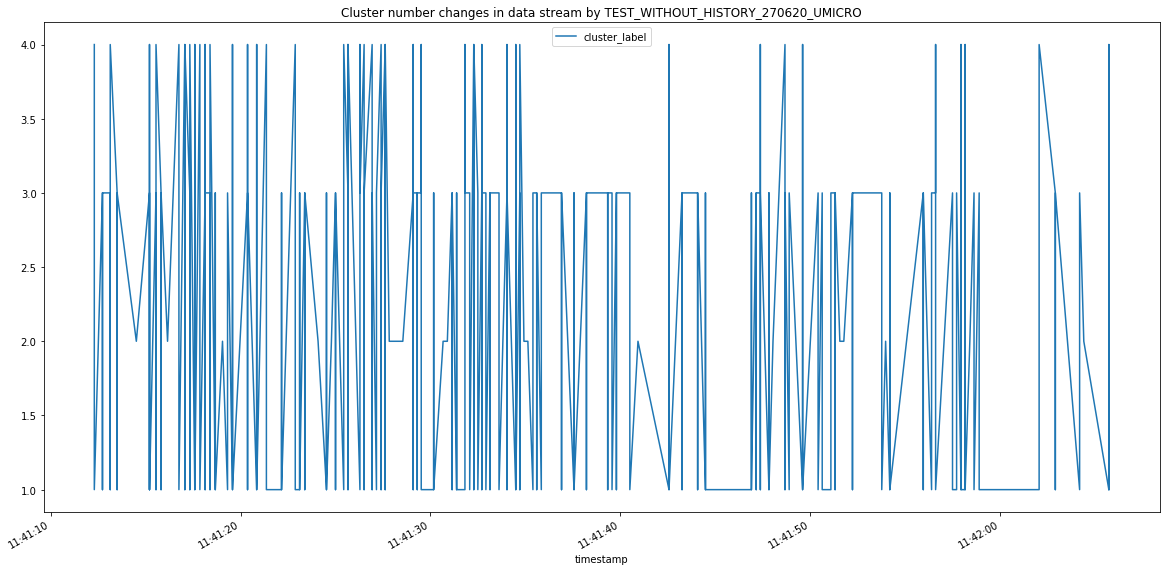

In [174]:
# Changes in number of cluster across time range
df_train[["cluster_label"]].plot(y="cluster_label", figsize=(20,10), title=f"Cluster number changes in data stream by {TRAIN_ALGORITHM_PREFIX_NAME.upper()}");

df_test[["cluster_label"]].plot(y="cluster_label", figsize=(20,10), title=f"Cluster number changes in data stream by {TEST_ALGORITHM_PREFIX_NAME.upper()}");




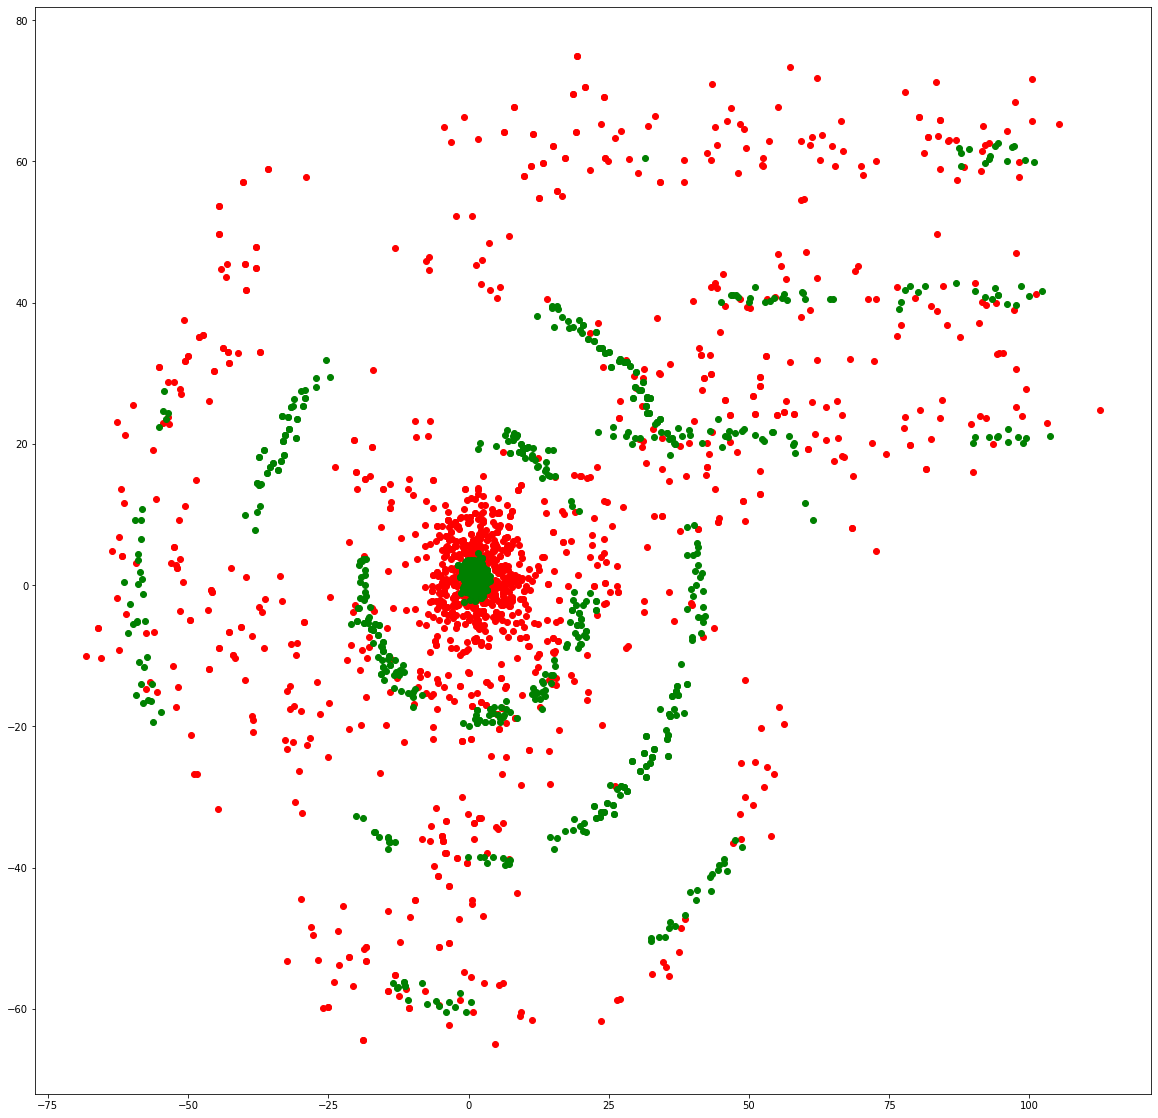

In [175]:
## Draw data points
x_train = np.stack(df_train["data_point"].values)[:,0]
y_train = np.stack(df_train["data_point"].values)[:,1]

x_test = np.stack(df_test["data_point"].values)[:,0]
y_test = np.stack(df_test["data_point"].values)[:,1]

f, ax = plt.subplots(sharey=True, figsize=(20,20))

ax.scatter(x_train,y_train, color="red");
ax.scatter(x_test, y_test, color="green");

In [176]:
fig.savefig(f"images/analysis_{ALGORITHM}-{ALGO_TRAIN_PREFIX}_data_stream_{current_time}.pdf")
fig.savefig(f"images/analysis_{ALGORITHM}-{ALGO_TRAIN_PREFIX}_data_stream_{current_time}.png")

In [177]:
pd.pivot_table(df_train, index=["timestamp","data_point_unique_id","cluster_label"],values="data_point_membership" )



data_point_membership
timestamp               data_point_unique_id        cluster_label                       
2020-07-08 11:24:43.647 [-2.25995006  4.06802573]   3                                1.0
                        [-2.47855193 -1.44357582]   3                                1.0
                        [-3.70131433  9.19661103]   3                                1.0
                        [-4.04496436  7.02416523]   3                                1.0
                        [-4.60193267  0.85626056]   3                                1.0
...                                                                                  ...
2020-07-08 11:25:43.958 [ 53.15228441 -25.73920691] 2                                1.0
                        [ 53.88937137 -35.60103212] 2                                1.0
                        [ 54.48074625 -26.80987245] 2                                1.0
                        [ 55.36337347 -17.2041162 ] 2                                1.0
                        [ 56.26661165 -19.67417549] 2                                1.0

[1469 rows x 1 columns]

In [178]:
df_train.columns

Index(['data_point', 'cluster_label', 'data_point_membership', 'centroid',
       'data_point_unique_id'],
      dtype='object')

In [179]:
df_test.columns

Index(['data_point', 'cluster_label', 'data_point_membership', 'centroid',
       'data_point_unique_id'],
      dtype='object')

# Metrics

Do some metric calculation for data 

## F1-score

In [180]:
from sklearn.metrics import f1_score

In [181]:
# Calculate along timestamp

def calculate_f1_score(predict_df,true_df):
    
    y_pred = predict_df["cluster_label"]
    y_true = true_df["cluster_label"]

    min_length = min(len(y_pred), len(y_true))
    
    return f1_score(y_true[:min_length], y_pred[:min_length],average='weighted')


In [182]:
# Overall F1 score for cluster structure
calculate_f1_score(df_train, df_test)

0.27548376103443534

In [183]:
min_length = min(len(df_train), len(df_test)) 


window = 10

f1_dynamic = []

for i in range(0,min_length, window):
    r = i + window
    
    train = df_train.iloc[i:r]
    test = df_test.iloc[i:r]
    
    if len(train) != len(test):
        continue
    
    try:
        f1 = calculate_f1_score(train, test)
    except ValueError as e:
        print(f"Different number of clusters,slices: {i}:{r}! Set current f1_score to -1")
        f1_dynamic.append(-1)
    else:    
        f1_dynamic.append(f1)

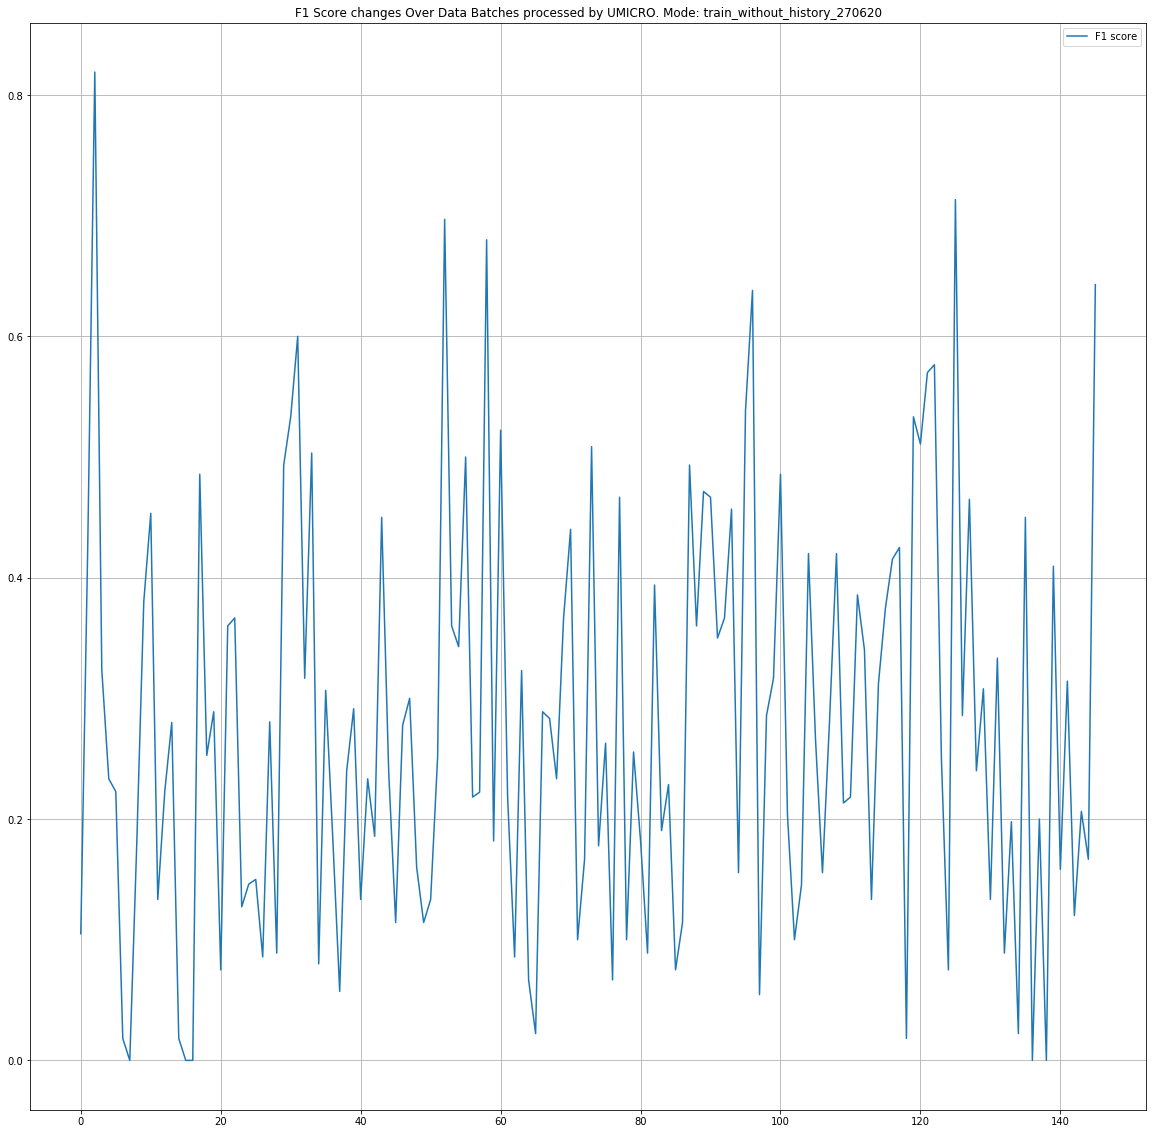

In [184]:
#Calculate over timestamps

fig, ax = plt.subplots(figsize=(20,20))

ax.plot(f1_dynamic, label="F1 score")
plt.legend()
plt.grid()
plt.title(f"F1 Score changes Over Data Batches processed by {ALGORITHM.upper()}. Mode: {ALGO_TRAIN_PREFIX}");

In [185]:
fig.savefig(f"images/analysis_{ALGORITHM}-{ALGO_TRAIN_PREFIX}_f1_score_changes_{current_time}.pdf")
fig.savefig(f"images/analysis_{ALGORITHM}-{ALGO_TRAIN_PREFIX}_f1_score_changes_{current_time}.png")

## Silhouette Score

In [186]:
from sklearn.metrics import silhouette_score

In [187]:
def get_unique_labels(df):
    return df["cluster_label"].unique()

In [188]:
def calculate_silhouette_score(df):
    
    X = np.stack(df["data_point"])
    
    labels = np.stack(df["cluster_label"])
    
    
    # In case, if labels are oue of valid values
    # Let's save, labels  values are [1,3], and 
    # here two points, then we change [1,3] to [1,2]
    
    # If we have less unique cluster labels than points
    
    if len(np.unique(labels)) == len(X):
        return 0
    
    for index in range(0,len(labels)):
        if labels[index] > len(X):
            labels[index]-=1
            
    #print(labels)
     
    if len(np.unique(labels))>1:
        return silhouette_score(X,labels)
    else:
        # If we have only one label, we cannot compare
        return 0
    

In [189]:
# Overall Silhouette for train DF
calculate_silhouette_score(df_train)

-0.03468296068029525

In [190]:
# Overall Silhouette for test DF
calculate_silhouette_score(df_test)

-0.26347677480746357

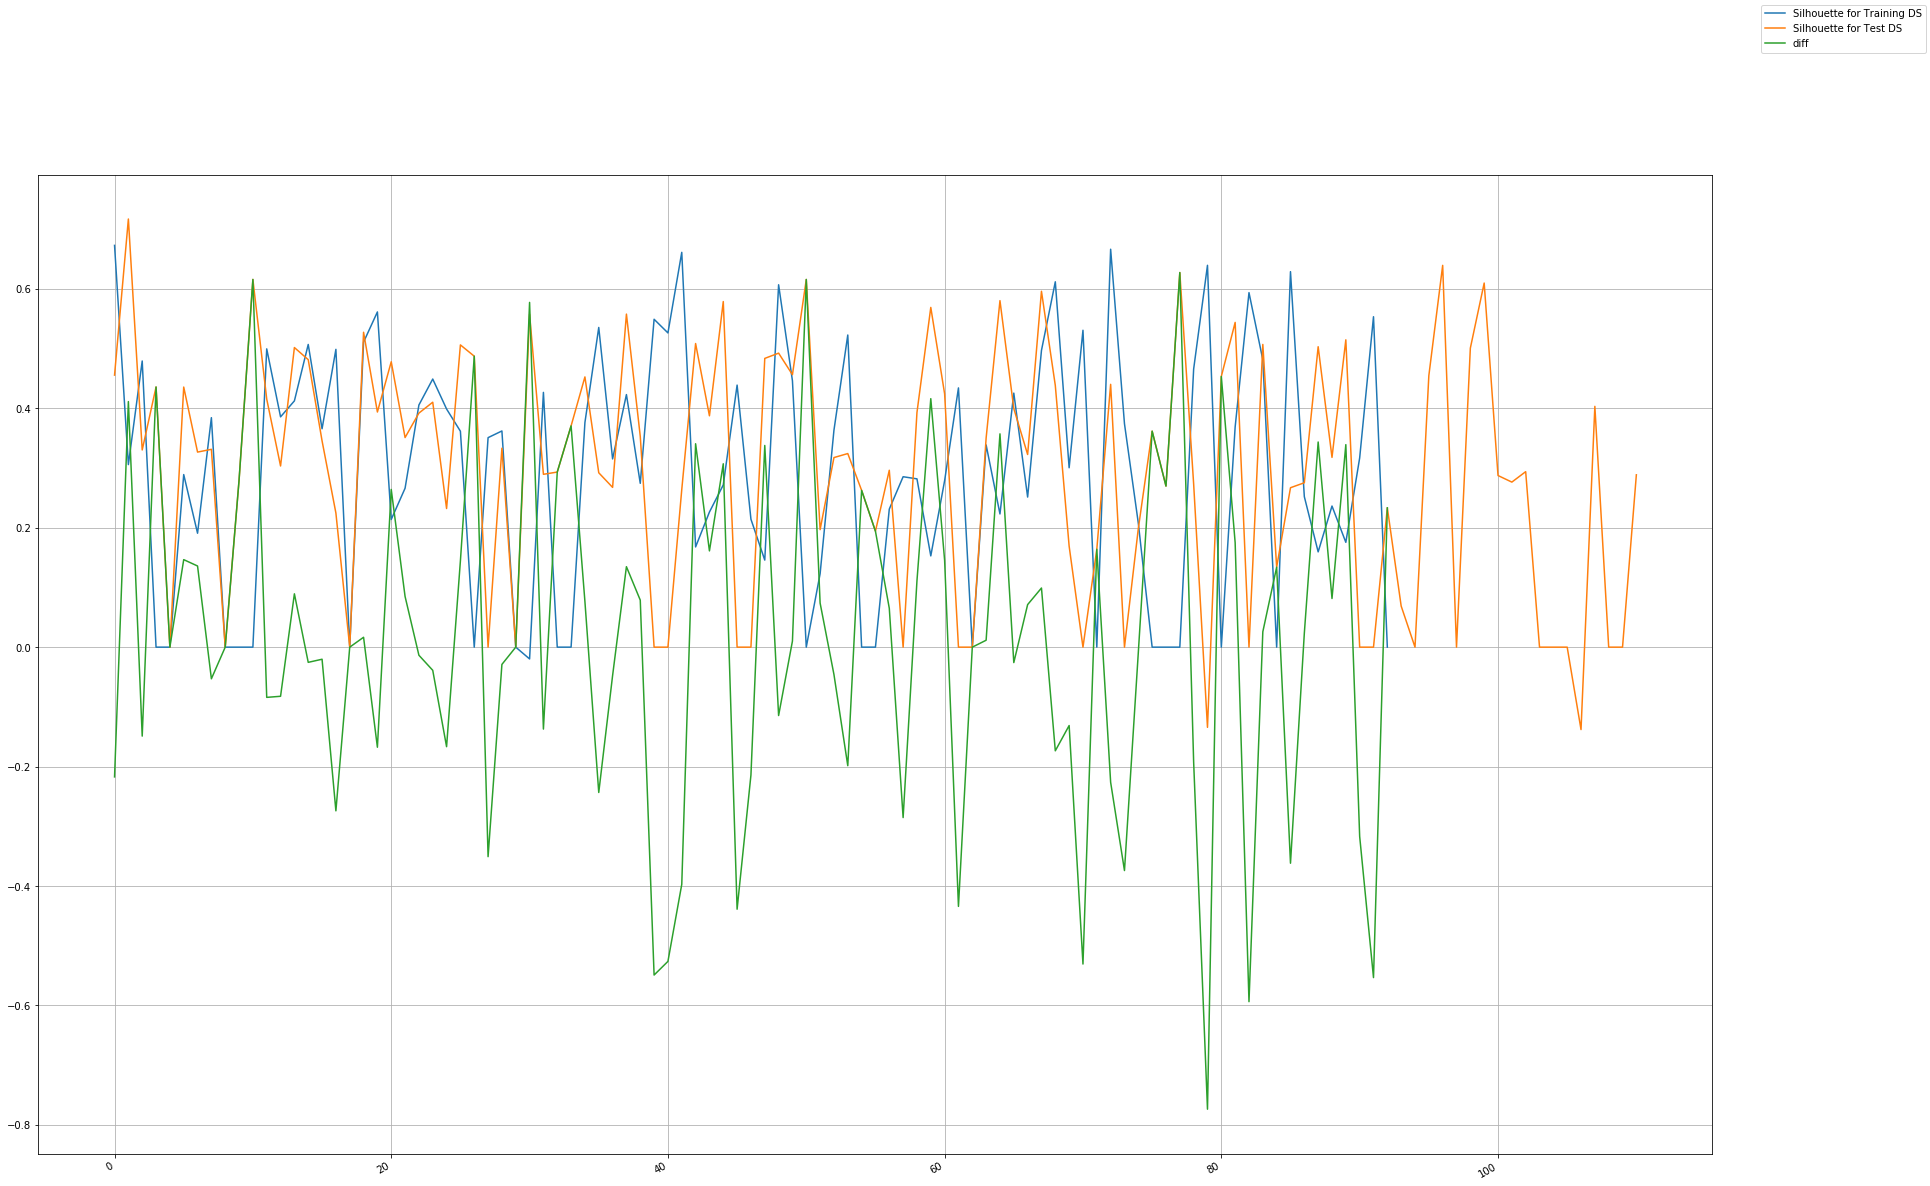

In [191]:
fig, ax = plt.subplots(figsize=(30,20))

train_silh_dynamic = df_train.groupby("timestamp").apply(calculate_silhouette_score)
test_silh_dynamic = df_test.groupby("timestamp").apply(calculate_silhouette_score)

# Show changes in Silhouette
min_length = min(len(train_silh_dynamic), len(test_silh_dynamic))
diff = np.stack(test_silh_dynamic)[:min_length] - np.stack(train_silh_dynamic)[:min_length]





train_silh_dynamic.plot(ax=ax,use_index =False,label="Silhouette for Training DS")
test_silh_dynamic.plot(ax=ax,use_index =False,label="Silhouette for Test DS")
ax.plot(diff, label="diff")


plt.grid()
fig.legend();

In [192]:

fig.savefig(f"images/analysis_{ALGORITHM}-{ALGO_TRAIN_PREFIX}_silhouette_changes_{current_time}.pdf")
fig.savefig(f"images/analysis_{ALGORITHM}-{ALGO_TRAIN_PREFIX}_silhouette_changes_{current_time}.png")